In [1]:
import matplotlib.pyplot as plt  # matplotlib for some plotting
import numpy as np  # numeric python functions
import pandas as pd  # need this to load our data from the csv files

from pyconturb import gen_turb, gen_spat_grid  # generate turbulence, useful helper
from pyconturb.sig_models import iec_sig  # IEC 61400-1 turbulence std dev
from pyconturb.spectral_models import kaimal_spectrum  # Kaimal spectrum
from pyconturb.wind_profiles import constant_profile, power_profile  # wind-speed profile functions

from _nb_utils import plot_slice

In [55]:
# y = np.linspace(-5, 5, 3) #11) #22)  # 11 lateral points from -50 to 50 (center @ 0)
# z = np.linspace(0.5, 10.5, 5) #13) # 26)  # 13 vertical points from 40 to 160 (center @ 100)

# to match ethan's example
y = np.linspace(-10.0, 10.0, 40) #11) #22)  # 11 lateral points from -50 to 50 (center @ 0)
z = np.linspace(0.00001, 10.5, 20) #13) # 26)  # 13 vertical points from 40 to 160 (center @ 100)

spat_df = gen_spat_grid(y, z)  # if `comps` not passed in, assumes all 3 components are wanted
spat_df.head()  # look at the first few rows

,u_p0,v_p0,w_p0,u_p1,v_p1,w_p1,u_p2,v_p2,w_p2,u_p3,...,w_p796,u_p797,v_p797,w_p797,u_p798,v_p798,w_p798,u_p799,v_p799,w_p799
k,0.00000,1.00000,2.00000,0.000000,1.000000,2.000000,0.000000,1.000000,2.000000,0.000000,...,2.000000,0.000000,1.000000,2.000000,0.000000,1.000000,2.000000,0.0,1.0,2.0
x,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
y,-10.00000,-10.00000,-10.00000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.0
z,0.00001,0.00001,0.00001,0.552641,0.552641,0.552641,1.105272,1.105272,1.105272,1.657903,...,8.842107,9.394738,9.394738,9.394738,9.947369,9.947369,9.947369,10.5,10.5,10.5


In [51]:
t_final = 10.0
t_steps = 50
dt = t_final / t_steps
time = np.linspace(0, t_final, t_steps)

In [56]:
turb_df = gen_turb(spat_df, T=t_final, dt=dt, u_ref=10) # T=10, dt = .05 s (20 Hz) when comparing to duramat measurements
turb_df.head()

,u_p0,v_p0,w_p0,u_p1,v_p1,w_p1,u_p2,v_p2,w_p2,u_p3,...,w_p796,u_p797,v_p797,w_p797,u_p798,v_p798,w_p798,u_p799,v_p799,w_p799
0.0,3.025474,-0.782439,1.198736,5.011875,1.761401,0.581223,3.830647,-1.484406,-1.894935,3.744532,...,-1.369328,5.481957,0.226180,-0.440861,5.633406,-0.107010,2.415105,5.163753,2.233026,0.838829
0.2,2.735109,-0.985008,-0.519480,5.572016,-1.358605,-0.091684,2.998359,-0.771493,-0.994776,3.088669,...,-1.432510,4.856717,-1.534083,0.665237,4.538577,-1.568829,1.151035,5.919960,1.383598,0.767892
0.4,3.557201,-1.826801,-0.575553,3.825959,0.203429,0.724159,3.717187,1.202883,-0.546655,4.541260,...,0.062682,4.734295,-1.885652,0.159556,3.634930,-0.335612,1.048234,6.359209,0.126968,0.505051
0.6,-0.256198,0.256306,-0.439668,3.835382,0.243441,0.821928,2.929843,1.873605,-0.466878,2.328065,...,-1.019924,2.630799,-1.361300,0.305581,3.897674,-0.866679,1.140027,3.679803,1.269094,-0.149545
0.8,-2.800728,-1.038624,0.193447,1.174205,-0.913586,-0.444466,1.109181,-0.672870,0.251764,4.009933,...,0.695080,5.325112,-2.414223,-0.208193,5.487907,-1.427659,-0.183523,4.866474,1.923720,1.556158


In [66]:
round(time[t],1)

np.float64(0.8)

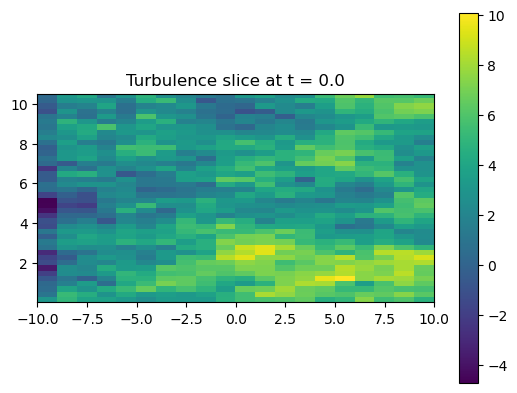

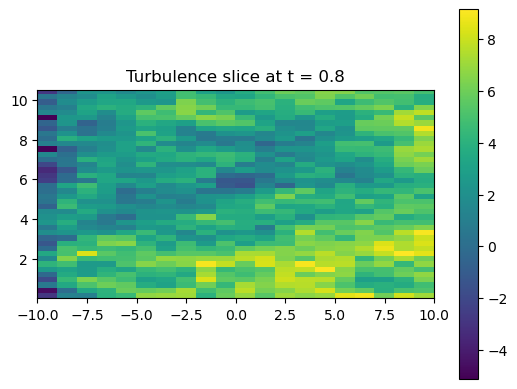

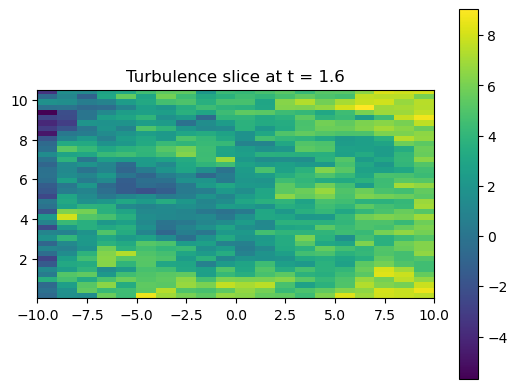

In [68]:
ts = [0, 4, 8] #[0.0, 2.0] #, 4.0]

for t in ts:
    ax = plot_slice(spat_df, turb_df, val=round(time[t],1))
    ax.set_title(f'Turbulence slice at t = {round(time[t],1)}');

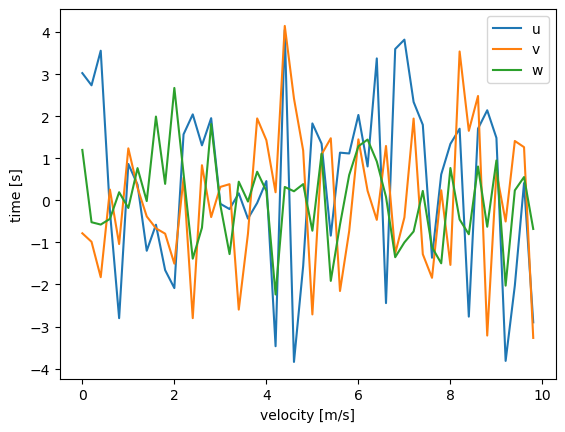

In [69]:
plt.plot(turb_df.u_p0, label='u')
plt.plot(turb_df.v_p0, label='v')
plt.plot(turb_df.w_p0, label='w')
plt.xlabel('velocity [m/s]')
plt.ylabel('time [s]')
plt.legend()

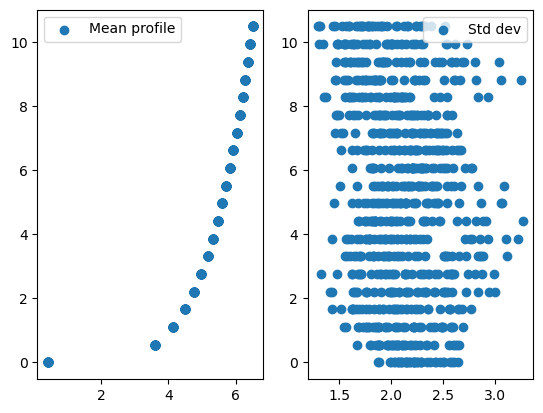

In [70]:
stats = turb_df.filter(regex='u_', axis=1).describe().loc[['mean', 'std']]
# plot
plt.clf(); plt.subplot(1, 2, 1);
plt.scatter(stats.loc['mean'], spat_df.filter(regex='u_').loc['z'], label='Mean profile')
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(stats.loc['std'], spat_df.filter(regex='u_').loc['z'], label='Std dev')
plt.legend();

In [11]:
# y = spat_df.loc['y'].unique()
# z = spat_df.loc['z'].unique()
# print(y)
# print(z)

[-5.  0.  5.]
[ 0.5  3.   5.5  8.  10.5]


In [75]:
# reshape to 3D array
data = {}
data['u'] = turb_df.filter(regex='u').values.reshape(len(turb_df),y.size,z.size)
data['v'] = turb_df.filter(regex='v').values.reshape(len(turb_df),y.size,z.size)
data['w'] = turb_df.filter(regex='w').values.reshape(len(turb_df),y.size,z.size)

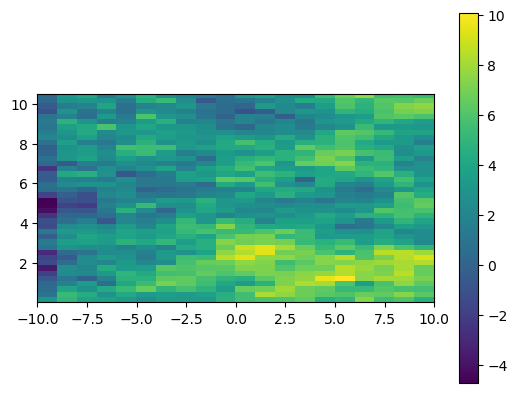

In [76]:
fig, ax = plt.subplots()
plt.imshow(data['u'][0,:,:],  # imshow requires nz-ny slice
            origin='lower',  # smallest y-z in lower left, not upper left
            extent=[y[0], y[-1], z[0], z[-1]],  # lateral and vertical limits
            interpolation='none')  # image smoothing
plt.colorbar()

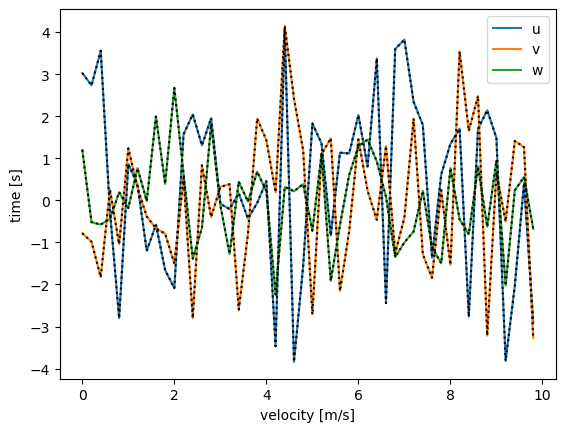

In [77]:
time = turb_df.index.values
fig, ax = plt.subplots()

ax.plot(turb_df.u_p0, label='u')
ax.plot(turb_df.v_p0, label='v')
ax.plot(turb_df.w_p0, label='w')
ax.plot(time,data['u'][:,0,0], 'k:', label='')
ax.plot(time,data['v'][:,0,0], 'k:', label='')
ax.plot(time,data['w'][:,0,0], 'k:', label='')
ax.set_xlabel('velocity [m/s]')
ax.set_ylabel('time [s]')
plt.legend()

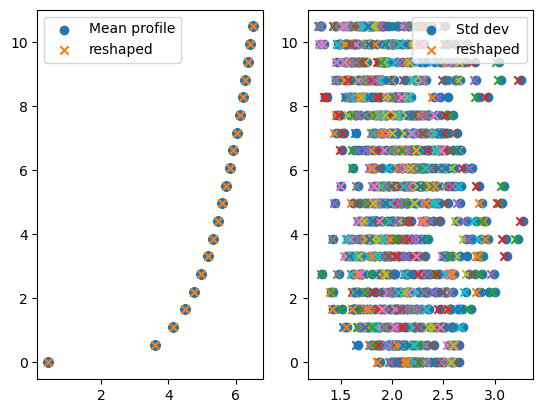

In [78]:
stats = turb_df.filter(regex='u_', axis=1).describe().loc[['mean', 'std']]
# plot
plt.clf(); plt.subplot(1, 2, 1);
plt.scatter(stats.loc['mean'], spat_df.filter(regex='u_').loc['z'], label='Mean profile')
plt.scatter((data['u'].mean(axis=0)).mean(axis=0), z, marker='x', label='reshaped')

plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(stats.loc['std'], spat_df.filter(regex='u_').loc['z'], label='Std dev')
for i in range(np.std(data['u'], axis=0).shape[0]):
    plt.scatter(np.std(data['u'], axis=0)[i,:], z, marker='x', label='reshaped' if i==0 else '')
plt.legend();

In [17]:
?gen_turb

Signature:
gen_turb(
    spat_df,
    T=600,
    nt=600,
    con_tc=None,
    coh_model='iec',
    coh_file=None,
    wsp_func=None,
    sig_func=None,
    spec_func=None,
    interp_data='none',
    seed=None,
    nf_chunk=1,
    dtype=<class 'numpy.float64'>,
    verbose=False,
    **kwargs,
)
Docstring:
Generate a turbulence box (constrained or unconstrained).

Parameters
----------
spat_df : pandas.DataFrame
    Spatial information on the points to simulate. Must have rows `[k, x, y, z]`,
    and each of the `n_sp` columns corresponds to a different spatial location and
    turbine component (u, v or w).
T : float, optional
    Total length of time to simulate in seconds. Default is 600.
nt : int, optional
    Number of time steps for generated turbulence. Default is 600.
con_tc : pyconturb TimeConstraint, optional
    Optional constraining data for the simulation. The TimeConstraint object is built
    into PyConTurb; see documentation for more details.
coh_model : str, optional
 